In [541]:
#%matplotlib ipympl
import kagglehub
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter

file = "House_Rent_Dataset.csv"

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "iamsouravbanerjee/house-rent-prediction-dataset", file)
cropped_df = df[["Rent", "Size"]].query('Rent <= 2000000 and Size <= 5000')

rent = cropped_df["Rent"].to_numpy(dtype=np.float64)
size = cropped_df["Size"].to_numpy(dtype=np.float64)

# feature scaling (Z-score normalization)
z_size = (size - np.mean(size)) / np.std(size)
z_rent = (rent - np.mean(rent))/ np.std(rent)

norm_rent: NDArray[np.float64] = z_rent
norm_size: NDArray[np.float64] = z_size

In [542]:
def reverse_zscore_norm(norm, std, mean):
    return norm * std + mean

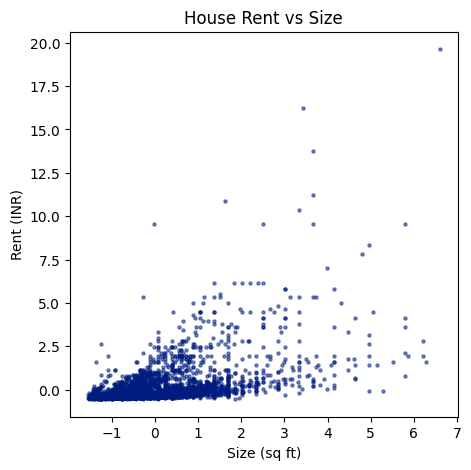

In [543]:
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(5, 5))
plt.scatter(norm_size, norm_rent, alpha=0.5, s=5)
plt.title("House Rent vs Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent (INR)")
plt.show()

In [544]:
def compute_cost(X, y, w, b):
    """
    Compute the cost function for linear regression.
    Args:
        X (NDArray[np.float64]): Feature matrix of shape (m,).
        y (NDArray[np.float64]): Target vector of shape (m,).
        w (NDArray[np.float64]): Weights vector of shape (n,).
        b (float): Bias term.
    """
    m = X.shape[0]
    predictions = X * w + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

Text(0.5, 1.0, 'Cost Function Contour Plot')

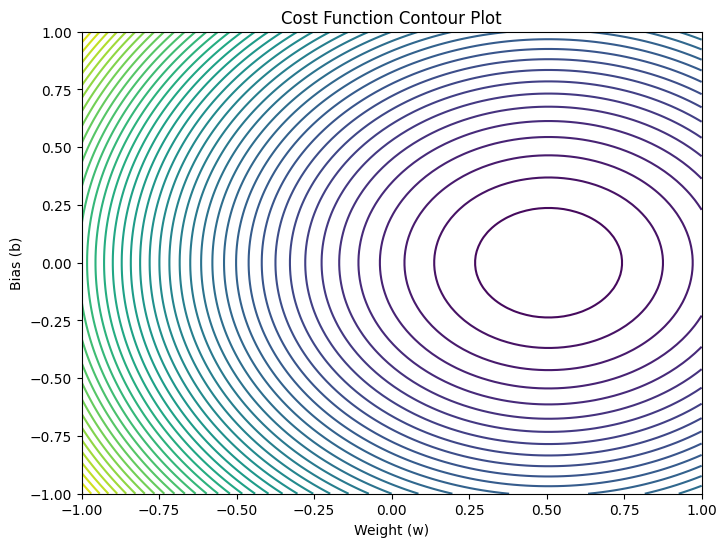

In [545]:
w_vals = np.linspace(-1, 1, 100)
b_vals = np.linspace(-1, 1, 100)
W, B = np.meshgrid(w_vals, b_vals)
Z = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = compute_cost(norm_size, norm_rent, W[i, j], B[i, j])
        
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(W, B, Z, levels=50, cmap='viridis')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_title('Cost Function Contour Plot')

In [546]:
def dCost_dw(X, y, w, b):
    """
    Compute the gradient of the cost function with respect to w.
    Args:
        X (NDArray[np.float64]): Feature matrix of shape (m,).
        y (NDArray[np.float64]): Target vector of shape (m,).
        w (float): Weight.
        b (float): Bias term.
    """
    m = X.shape[0]
    predictions = X * w + b
    gradient = (1 / m) * np.sum((predictions - y) * X)
    return gradient

def dCost_db(X, y, w, b):
    """
    Compute the gradient of the cost function with respect to b.
    Args:
        X (NDArray[np.float64]): Feature matrix of shape (m,).
        y (NDArray[np.float64]): Target vector of shape (m,).
        w (float): Weight.
        b (float): Bias term.
    """
    m = X.shape[0]
    predictions = X * w + b
    gradient = (1 / m) * np.sum(predictions - y)
    return gradient

In [547]:
w_init = -0.8
b_init = 0.8
iter = 0
alpha = 0.01
epsilon = 1e-7
cost_threshold = 1

w_path = []
b_path = []
cost_history = []

while cost_threshold > epsilon:
    iter += 1
    
    dw = dCost_dw(norm_size, norm_rent, w_init, b_init)
    db = dCost_db(norm_size, norm_rent, w_init, b_init)
    
    w_init -= alpha * dw
    b_init -= alpha * db
    
    w_path.append(w_init)
    b_path.append(b_init)
    
    cost_history.append(compute_cost(norm_size, norm_rent, w_init, b_init))
    
    if len(cost_history) > 2:
        cost_threshold = abs(cost_history[-2] - cost_history[-1])
        
iterspace = np.linspace(0, iter, iter)
print(f"Number of iterations: {iter}")

Number of iterations: 616


Text(0.5, 1.0, 'Gradient Descent Path on Cost Function Contour Plot')

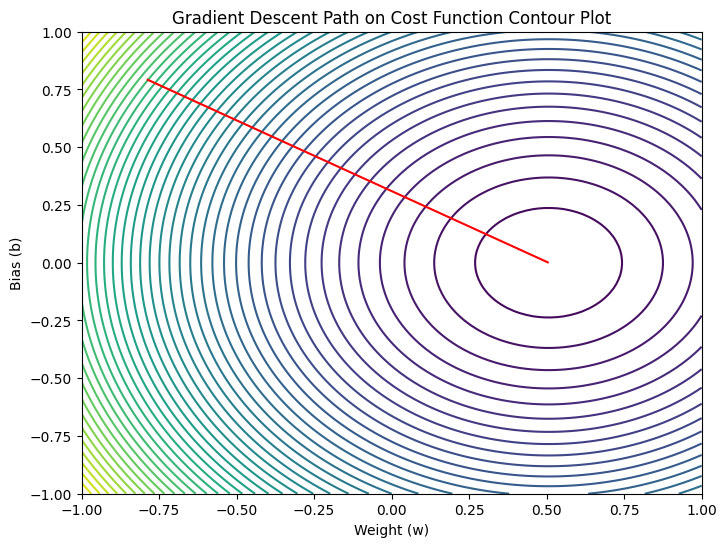

In [548]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(W, B, Z, levels=50, cmap='viridis')
ax.plot(w_path, b_path, color='red', linestyle="-", label='Gradient Descent Path')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_title('Gradient Descent Path on Cost Function Contour Plot')

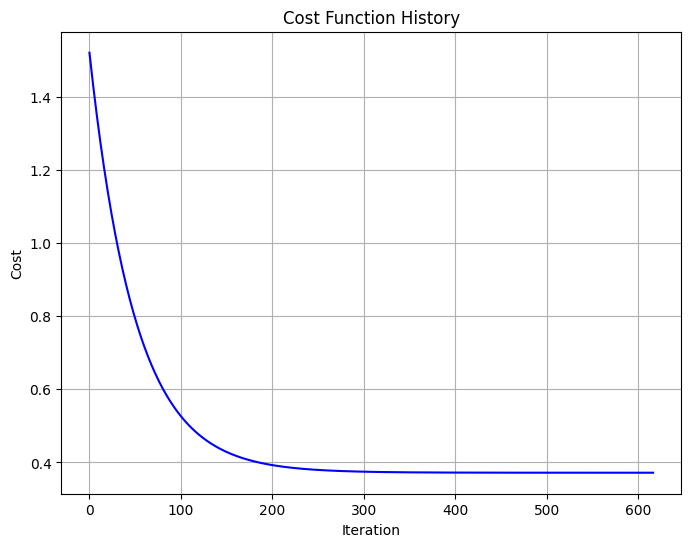

In [549]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(iterspace, cost_history, color='blue')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Cost Function History')
ax.grid(True)

In [550]:
final_w = w_path[-1]
final_b = b_path[-1]

print(f"Final weight (w): {final_w}")
print(f"Final bias (b): {final_b}")

Final weight (w): 0.5035554248044244
Final bias (b): 0.0016382110805138266


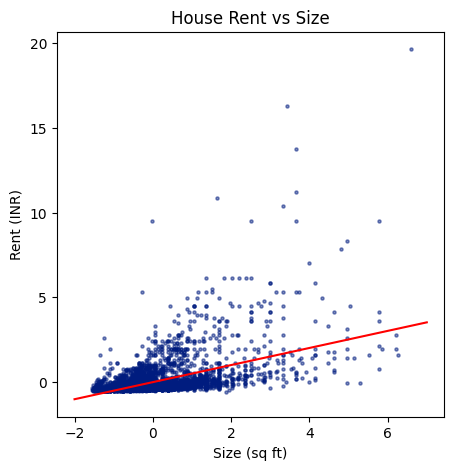

In [551]:
x_line = np.linspace(-2, 7, 10)
y_line = final_w * x_line + final_b

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(5, 5))
plt.scatter(norm_size, norm_rent, alpha=0.5, s=5)
plt.plot(x_line, y_line, color='red', label='y = mx + b')
plt.title("House Rent vs Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent (INR)")
plt.show()